Assignment 2

Modify Euler and verlet integrators to deal with three dimensional vectors.

Check them by simulating:
1. Straight down decent (plotting altitude)
2. Elliptical orbit (in the orbital plane)
3. Circular orbit (in the orbital plane)
4. Hyperbolic escpae(in the orbital plane)

I have also attempted to add some drag into the simulation near the end.

Euler integration technique:

\begin{equation}
v(t + \Delta t) = v(t) + \Delta t \frac{dv}{dt} + \mathcal{O}(\Delta t ^ {2})
\end{equation}

\begin{equation}
x(t + \Delta t) = x(t) + \Delta t v(t) + \mathcal{O}(\Delta t ^ {2})
\end{equation}

Verlet integration technique:

\begin{equation}
x(t + \Delta t) = 2x(t) - x(t - \Delta t) - \Delta t^{2} \frac{d^{2}x}{dx^{2}} + \mathcal{O}(\Delta t ^ {4})
\end{equation}

Central difference technique for velocity:

\begin{equation}
v(t+\Delta t) = \frac{1}{2\Delta t} [x(t + \Delta t) - x(t - \Delta t)] + \mathcal{O}(\Delta t ^ {2})
\end{equation}

The important thing to note for this project is how they are derived and the order of the error they produce


Functions used for analysing and plotting data

- Altitude plot: Generates a list of altituedes given a list of positions.

- Plane basis: Uses techniques from linear algebra to transfrom a list of 3D coordinates representing the orbital path to a list of 2D coordinates in the orbital plane. This allows for visualisation of the orbit shape.

- Creates coordinates for 2 Dimensional representation of mars for visualisation purposes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def altitude_plot(r,rad):
    return [(np.linalg.norm(i)-rad) for i in r]



def plane_basis(r,v):
    i = r[0]/np.linalg.norm(r[0]) #first basis vector in the plane

    if v[0].all != 0:
        k = np.cross(r[0], v[0]) 

    else:
        k = np.cross(r[0],r[1000])
    
    
    k = k/np.linalg.norm(k) #thrid basis vector perpendicular to the plane (coefficient of zero for all velocity and positon)

    j = np.cross(k,i) #second basis vector also in plane, perpendicular to the first
    
    basis_change = np.linalg.inv(np.transpose(np.array((i,j,k)))) # matrix used to change the basis from xyz to coords in plane
    
    cords_in_plane = [list(np.dot(basis_change,i)) for i in r] # array of new coordinates in the plane created

    return cords_in_plane


marsth = np.linspace(0,2*np.pi,1000)
marsx = [3.3895e6*np.cos(i) for i in marsth]
marsy = [3.3895e6*np.sin(i) for i in marsth]
            

Simulation of a small body in orbit given an intial velocity and position using euler integration. 

This is a proof of concept for both the euler integration and change of basis transformation (notice that the inital velocity is not in a cartesian plane)

First 5 positons 
[[4189500.         1000000.         4000000.        ]
 [4189560.         1000045.         3999925.9075    ]
 [4189619.99780072 1000089.99947505 3999851.8129002 ]
 [4189679.99340212 1000134.99842512 3999777.71620062]]
First 5 coordinates in plane: 
[[5878087.295200709, 4.967262157151708e-10, -3.093845180046628e-10], [5878087.295200709, 105.42627071255993, -3.6199563033550173e-10], [5878087.292115, 210.85254142444015, -2.682080981347119e-10], [5878087.285943582, 316.27881208103497, -3.938936668723061e-10]]
Inital distance from origin, this should be intial x coordinate in plane: 
5878087.29520071


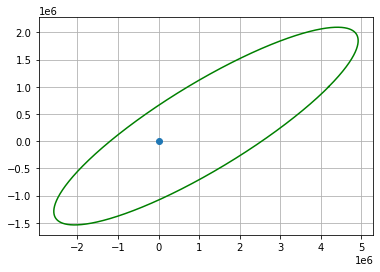

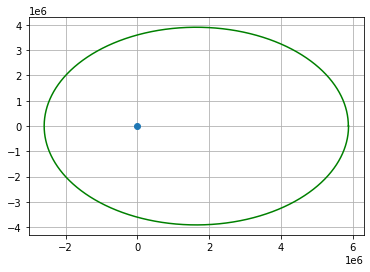

In [2]:
M = 6.39e23 # mass of mars
G = 6.674e-11 # universal gravitational constant
r0 = [800e3+3389.5e3,1000e3,4000e3] # intial positon
v0 = [1200,900,-1481.85] # intial velocity (in this case perpendicular to positon)
dt = 0.05 # time step
tf = 8400 # final time in simulation




def euler_solve3(M,G,r0,v0,dt,tf):
    
    time = np.arange(0,tf,dt)

    r = np.zeros((len(time),3))
    r[0] = r0

    v = np.zeros((len(time),3))
    v[0] = v0

    for i in range(len(time)-1):
        v[i+1] = v[i] - (dt*M*G*r[i])/(np.linalg.norm(r[i])**3)
        
        r[i+1] = r[i] + (dt*v[i])
    
    return time,r,v


time,r,v = euler_solve3(M,G,r0,v0,dt,tf)

print('First 5 positons ')

print(r[0:4])

cords_in_plane = plane_basis(r,v)

print('First 5 coordinates in plane: ')

print(cords_in_plane[0:4])

print('Inital distance from origin, this should be intial x coordinate in plane: ')

print(np.linalg.norm(r[0]))


x_positions = [i[0] for i in r]
y_positions = [i[1] for i in r]

plt.plot([0],[0],marker='o')
plt.plot(x_positions, y_positions,color='green')
plt.grid()
plt.show() 


plt.plot([0],[0],marker='o')

in_plane_x = [i[0] for i in cords_in_plane]
in_plane_y = [i[1] for i in cords_in_plane]
plt.plot(in_plane_x,in_plane_y,color='green')
plt.grid()
plt.show()

Simulation of a small body in orbit given an intial velocity and position using verlet integration

First 5 positons 
[[4189500.         1000000.         4000000.        ]
 [4189560.         1000045.         3999925.9075    ]
 [4189619.99780069 1000089.99947503 3999851.81290023]
 [4189679.99340202 1000134.99842505 3999777.71620074]]
First 5 coordinates in plane: 
[[5878087.295200709, 4.967262157151708e-10, -3.093845180046628e-10], [5878087.295200709, 105.42627071255993, -3.6199563033550173e-10], [5878087.292115001, 210.85254136901045, -4.21085829897437e-10], [5878087.285943583, 316.2788119152116, -5.03280896679677e-10]]
Inital distance from origin, this should be intial x coordinate in plane: 
5878087.29520071


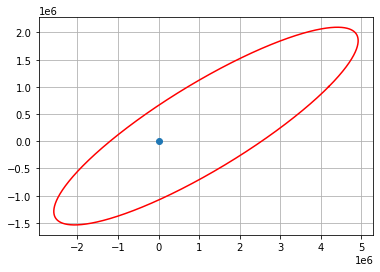

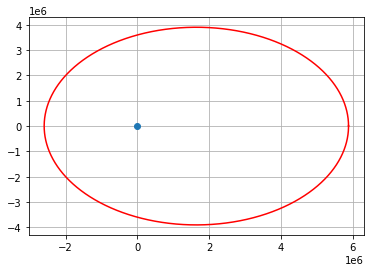

In [3]:
def verlet_solve3(M,G,r0,v0,dt,tf):

    time = np.arange(0, tf, dt)

    r = np.zeros((len(time),3))
    r[0] = r0

    v = np.zeros((len(time),3))
    v[0] = v0

    r[1] = r[0] + (dt*v[0])

    for i in range(1, len(time)-1):
        
        r[i+1] = 2*r[i] - r[i-1] - ((dt**2)*G*M*r[i])/(np.linalg.norm(r[i])**3)
        
        v[i] = (r[i+1] - r[i-1])/(2*dt)

    v[-1] = v[-2] - (dt*G*M*r[-2])/(np.linalg.norm(r[i])**3)

    return time,r,v



time,r,v = verlet_solve3(M,G,r0,v0,dt,tf)

print('First 5 positons ')

print(r[0:4])

cords_in_plane = plane_basis(r,v)

print('First 5 coordinates in plane: ')

print(cords_in_plane[0:4])

print('Inital distance from origin, this should be intial x coordinate in plane: ')

print(np.linalg.norm(r[0]))


x_positions = [i[0] for i in r]
y_positions = [i[1] for i in r]

plt.plot([0],[0],marker='o')
plt.plot(x_positions, y_positions,color='red')
plt.grid()
plt.show() 


plt.plot([0],[0],marker='o')
in_plane_x = [i[0] for i in cords_in_plane]
in_plane_y = [i[1] for i in cords_in_plane]
plt.plot(in_plane_x,in_plane_y,color='red')
plt.grid()
plt.show()


Altitude plot for small object sttarting at 250km above mars with zero velocity (Euler integration)

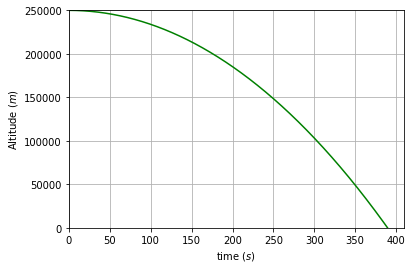

In [4]:
time,r,v = euler_solve3(M,G,[3389.5e3+250e3,0,0],[0,0,0],0.1,390)
altitude = altitude_plot(r,3389.5e3)
plt.plot(time,altitude,color='green')
plt.ylim(0,altitude[0])
plt.xlim(left = 0)
plt.xlabel('time $(s)$')
plt.ylabel('Altitude $(m)$')
plt.grid()
plt.show()

Altitude plot for small object sttarting at 250km above mars with zero velocity (verlet integration)

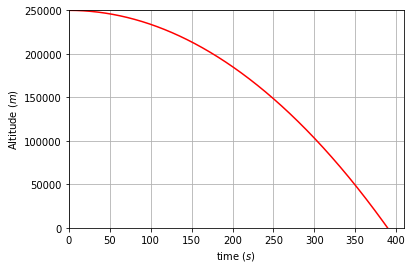

In [5]:
time,r,v = verlet_solve3(M,G,[3389.5e3+250e3,0,0],[0,0,0],0.1,390)
altitude = altitude_plot(r,3389.5e3)
plt.plot(time,altitude,color='red')
plt.ylim(0,altitude[0])
plt.xlim(left = 0)
plt.xlabel('time $(s)$')
plt.ylabel('Altitude $(m)$')
plt.grid()
plt.show()

Simulation of a circular orbit (euler integration)

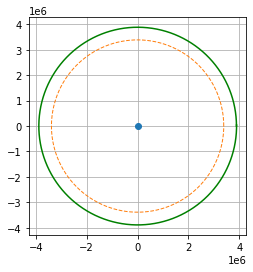

In [6]:
time,r,v = euler_solve3(M,G,[3.3895e6+500e3,0,0],[0,3310,0],0.1,7390)

x_positions = [i[0] for i in r]
y_positions = [i[1] for i in r]

plt.plot([0],[0],marker='o')
plt.plot(marsx,marsy,linestyle='dashed',linewidth=1)
plt.plot(x_positions, y_positions,color='green')
plt.gca().set_aspect(1)
plt.grid()
plt.show() 

Simulation of a circular orbit (verlet integration)

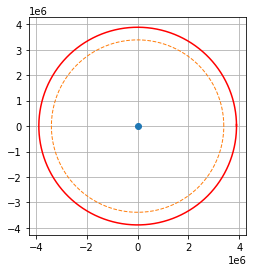

In [7]:
time,r,v = verlet_solve3(M,G,[3.3895e6+500e3,0,0],[0,3310,0],0.1,7390)

x_positions = [i[0] for i in r]
y_positions = [i[1] for i in r]

plt.plot([0],[0],marker='o')
plt.plot(x_positions, y_positions,color='red')
plt.plot(marsx,marsy,linestyle='dashed',linewidth=1)
plt.gca().set_aspect(1)
plt.grid()
plt.show() 

Simulation of eliptical orbit (Euler integration)

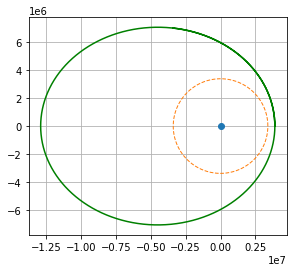

In [8]:
time,r,v = euler_solve3(M,G,[3.3895e6+500e3,0,0],[0,3420*1.2,0],0.1,6690*4)

x_positions = [i[0] for i in r]
y_positions = [i[1] for i in r]

plt.plot([0],[0],marker='o')
plt.plot(x_positions, y_positions,color='green')
plt.plot(marsx,marsy,linestyle='dashed',linewidth=1)
plt.gca().set_aspect(1)
plt.grid()
plt.show() 

Simulation of eliptical orbit (verlet integration)

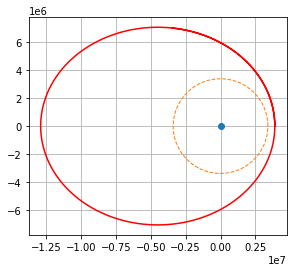

In [9]:
time,r,v = verlet_solve3(M,G,[3.3895e6+500e3,0,0],[0,3420*1.2,0],0.1,6690*4)

x_positions = [i[0] for i in r]
y_positions = [i[1] for i in r]

plt.plot([0],[0],marker='o')
plt.plot(x_positions, y_positions,color='red')
plt.plot(marsx,marsy,linestyle='dashed',linewidth=1)
plt.gca().set_aspect(1)
plt.grid()
plt.show() 

Simulation of hyperbolic exit (euler integration)

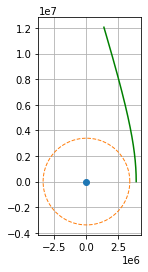

In [10]:
time,r,v = euler_solve3(M,G,[3.3895e6+500e3,0,0],[0,3420*2,0],0.1,6690*0.3)

x_positions = [i[0] for i in r]
y_positions = [i[1] for i in r]

plt.plot([0],[0],marker='o')
plt.plot(x_positions, y_positions,color='green')
plt.plot(marsx,marsy,linestyle='dashed',linewidth=1)
plt.gca().set_aspect(1)
plt.grid()
plt.show() 

Simulation of hyperbolic escape (verlet integration)

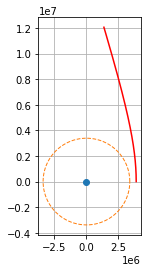

In [11]:
time,r,v = verlet_solve3(M,G,[3.3895e6+500e3,0,0],[0,3420*2,0],0.1,6690*0.3)

x_positions = [i[0] for i in r]
y_positions = [i[1] for i in r]

plt.plot([0],[0],marker='o')
plt.plot(x_positions, y_positions,color='red')
plt.plot(marsx,marsy,linestyle='dashed',linewidth=1)
plt.gca().set_aspect(1)
plt.grid()
plt.show() 

Set up with larger time intervals and longer time step to compare the orbits yielded from euler and verlet integration. 

More than one orbit is simulated to compare the stability of the orbit.

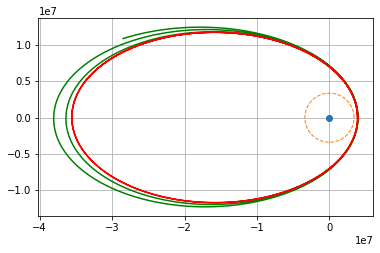

In [12]:
timee,re,ve = euler_solve3(M,G,[3.3895e6+500e3,0,0],[0,3420*1.3,0],2.5,6690*30)
timev,rv,vv = verlet_solve3(M,G,[3.3895e6+500e3,0,0],[0,3420*1.3,0],2.5,6690*30)

x_positionse = [i[0] for i in re]
y_positionse = [i[1] for i in re]

x_positionsv = [i[0] for i in rv]
y_positionsv = [i[1] for i in rv]

plt.plot([0],[0],marker='o')
plt.plot(x_positionse, y_positionse,color='green')
plt.plot(x_positionsv, y_positionsv,color='red')
plt.plot(marsx,marsy,linestyle='dashed',linewidth=1)
plt.gca().set_aspect(1)
plt.grid()
plt.show() 



Adding drag into the simulation
A simple model is used for drag:
\begin{equation}
F = - \frac{\rho C_{d}A}{2} \mid v \mid \overrightarrow{v}
\end{equation}
Another simple model is used to approximate atmospheric density ($a = \text{altitude}$):

\begin{equation}
\rho = 0.17 e^{0.00009a}  \: \: \: \: \: \:  \text{for altitude < exosphere height}
\end{equation}

In [65]:
def atmospheric_density (r):
  # Simple exponential model between surface and exosphere (around 200km), surface density is approximately 0.017 kg/m^3,
  # scale height is approximately 11km
    EXOSPHERE = 200000.0

    alt = np.linalg.norm(r) -3.3895e6
    if alt > EXOSPHERE:
        return 0.0
    else: 
        return (0.017 * np.exp(-alt/11000.0))



def verlet_orbit_drag(M,G,r0,v0,dt,tf,Cd,object_mass,A):

    time = np.arange(0, tf, dt)

    r = np.zeros((len(time),3))
    r[0] = r0

    v = np.zeros((len(time),3))
    v[0] = v0

    d = np.zeros(len(time),3)

    r[1] = r[0] + (dt*v[0])

    for i in range(1, len(time)-1):
        drag = 0.5 * Cd * A * atmospheric_density(r[i]) * v[i-1] * np.linalg.norm(v[i-1])

        r[i+1] = 2*r[i] - r[i-1] - (dt**2) * (G*M*r[i])/(np.linalg.norm(r[i])**3) - (dt**2) * (drag/object_mass)
        
        v[i] = (r[i+1] - r[i-1])/(2*dt) 


    v[-1] = v[-2] - (dt*G*M*r[-2])/(np.linalg.norm(r[i])**3)

    return time,r,d

[     0.         171029.18449596      0.        ]
[ -155.25733858 83071.95488158     0.        ]
[ -153.24869663 10372.77235201     0.        ]
[ -78.65557458 1105.12651303    0.        ]
[-82.26677093 621.48168137   0.        ]
[-102.63164651  568.11141891    0.        ]
[-123.30083378  537.01014771    0.        ]
[-143.29231266  511.13220762    0.        ]
[-162.86712963  489.1519827     0.        ]
[-182.30886761  470.46135402    0.        ]
[-201.8588794   454.56619892    0.        ]
[-221.71858581  441.04370705    0.        ]
[-242.05332307  429.52594903    0.        ]
[-262.99492906  419.68823828    0.        ]
[-284.64336804  411.24052983    0.        ]
[-307.06773353  403.92109754    0.        ]
[-330.30689655  397.49195467    0.        ]
[-354.37001241  391.73562343    0.        ]
[-379.23706215  386.45295815    0.        ]
[-404.85957908  381.46179589    0.        ]
[-431.16169049  376.59625547    0.        ]
[-458.04158557  371.70653605    0.        ]
[-485.37349911  366.659

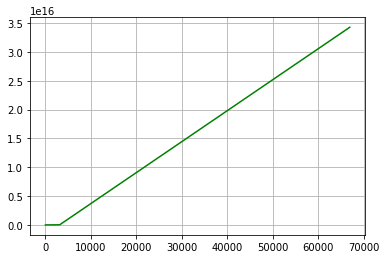

In [66]:
time,rd,d = verlet_orbit_drag(M,G,[3.3895e6+20e3,0,0],[0,3420*1.03,0],2.5,6690*10,2,200,5)

x_positionsd = [i[0] for i in rd]
y_positionsd = [i[1] for i in rd]

alt = altitude_plot(rd,3.3895e6)

plt.plot(time, alt,color='green')
plt.grid()
plt.show() 


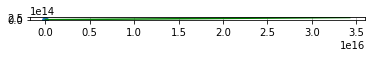

In [64]:
plt.plot([0],[0],marker='o')
plt.plot(x_positionsd, y_positionsd,color='green')
plt.plot(marsx,marsy,linestyle='dashed',linewidth=1)
plt.gca().set_aspect(1)
plt.grid()
plt.show() 

[10.  0.  0.] position
[0. 0. 0.] velocity
[9.9504213 0.        0.       ] position
[-0.10032514  0.          0.        ] velocity
[9.79968736 0.         0.        ] position
[-0.20268521  0.          0.        ] velocity
[9.54465931 0.         0.        ] position
[-0.30937315  0.          0.        ] velocity
[9.17966471 0.         0.        ] position
[-0.42323132  0.          0.        ] velocity
[8.69572477 0.         0.        ] position
[-0.54814838  0.          0.        ] velocity
[8.07910222 0.         0.        ] position
[-0.68998528  0.          0.        ] velocity
[7.30848254 0.         0.        ] position
[-0.85855924  0.          0.        ] velocity
[6.34895602 0.         0.        ] position
[-1.07264756  0.          0.        ] velocity
[5.13683567 0.         0.        ] position
[-1.37594184  0.          0.        ] velocity


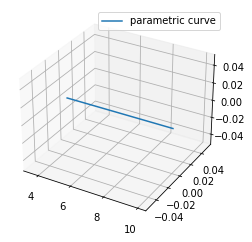

In [15]:
time,r,v = euler_solve3(10,1,[10,0,0],[0,0,0],0.01,10)
for i in range(0,1000,100):
    print(str(r[i]) + ' position')
    print(str(v[i])+ ' velocity')


x_positions = [r[i][0] for i in range(len(r))]
y_positions = [r[i][1] for i in range(len(r))]
z_positions = [r[i][2] for i in range(len(r))]

ax = plt.figure().add_subplot(projection='3d')

ax.plot(x_positions, y_positions, z_positions, label='parametric curve')
ax.legend()

plt.show()


In [16]:
#creating a vector perpendicular to the intial position

#the velocity vector i had before [0,2000,0]

inital_position = [800e3+3389.5e3,1000e3,4000e3]

xv = 400
yv = 300
zv = -((inital_position[1]*yv)+inital_position[0]*xv)/inital_position[2]

perpendicular_velocity = np.array([xv,yv,zv])*3

print(perpendicular_velocity)

print(np.dot(perpendicular_velocity,inital_position))

#found_perpendicular [1200,900,-1481.85]


[ 1200.     900.   -1481.85]
3.637978807091713e-07
